# (Part 2) 4.9 Intro to Data Visualization with Python

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

pd.options.display.float_format = '{:.2f}'.format

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
print(color.BLUE + 'Read orders_products_customer_merged.pkl file' + color.END)

path = r'C:\\Users\\mutta\\Documents\\Project 4\\' 
ords_prods_customer_pkl = os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merged.pkl')

df_ords_prods_custs  = pd.read_pickle(ords_prods_customer_pkl)
df_ords_prods_custs.head(10)

print(color.BLUE + 'orders_products_customer_merged.pkl file read successful' + color.END)



Read orders_products_customer_merged.pkl file
 orders_products_customer_merged.pkl file read successful


## From exercise  a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

#### Bar Chart: Total Orders in a day of the week

Bar Chart: Total Orders in a day of the week 
----------------------------------------------------


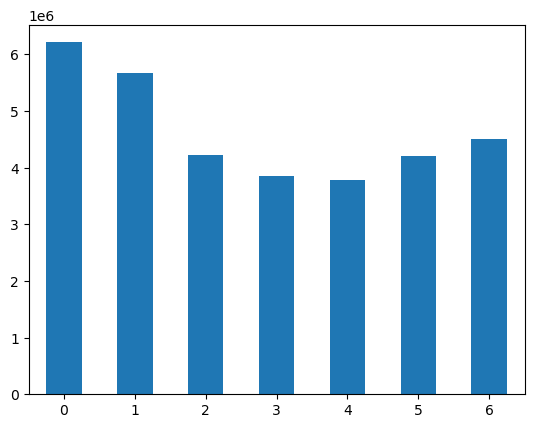

In [2]:
print('Bar Chart: Total Orders in a day of the week ')

print('----------------------------------------------------')

bar = df_ords_prods_custs['orders_day_of_week'].value_counts().sort_index().plot.bar(y='Number of orders', rot=0)

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#### Sales price distribution on products orders

Scatter plot: sales price distribution on customer orders
----------------------------------------------------


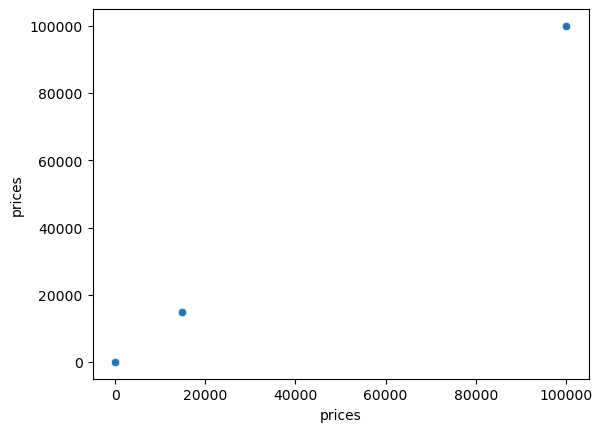

In [3]:
print('Scatter plot: sales price distribution on customer orders')
print('----------------------------------------------------')

scatter_plot = sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_custs)

scatter_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_plot_prices.png'))



From the output there are 5,127 rows with outlier observations (prices greater than 100 dollar ). 
In addition, at the top of the prices column, there’s another odd value, dollar 14,900.00, which 
corresponds to the second unexplainable point in the scatterplot. Following this is the 
dollar 99,999.00 identified previously. As such, the dollar 14,900.00 and 99,999.00 values that are skewing charts.

In [3]:
df_ords_prods_custs.loc[df_ords_prods_custs['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,_merge


In [2]:
print('Outliers values above 100 price are converted to nan values')

df_ords_prods_custs.loc[df_ords_prods_custs['prices'] > 100, 'prices'] = np.nan

print('After conversion outliers the max value in prices is: ', df_ords_prods_custs['prices'].max() )

Outliers values above 100 price are converted to nan values
After conversion outliers the max value in prices is:  25.0


### Histogram on sales price

Histogram on sales price
-------------------------------------------


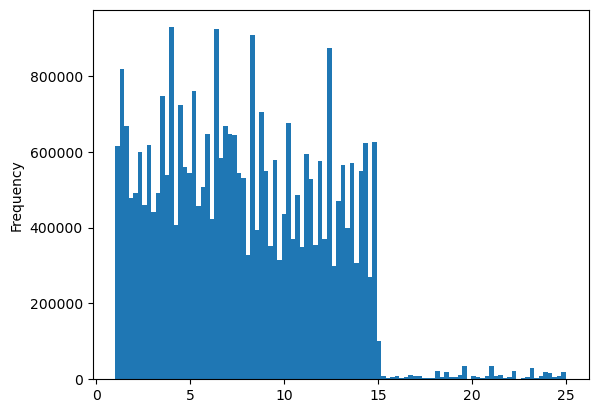

In [6]:

print('Histogram on sales price')

print('-------------------------------------------')

histogram_prices = df_ords_prods_custs['prices'].plot.hist(bins = 100)

histogram_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))



## Sampling Data

In [7]:
np.random.seed(4)
#create true/false list containing 0.7 are true and 0.3 are false
dev = []
dev = ( np.random.rand(len(df_ords_prods_custs)) <= 0.7 )

#Split the df_ords_prods_merged in ratio of 7:3
df_big = df_ords_prods_custs[dev]
df_small = df_ords_prods_custs[~dev]

In [8]:
print('Varify length')
print('-------------------------------------------')
print('Length of original data frame:' , len(df_ords_prods_custs))
print('Split data frame size:', len(df_big), '+', len(df_small) ,'=' , len(df_big) + len(df_small) )

Varify length
-------------------------------------------
Length of original data frame: 32435059
Split data frame size: 22705099 + 9729960 = 32435059


##### Line chart on sales price vs orders day of week

Line chart on sales price vs orders day of week
-------------------------------------------


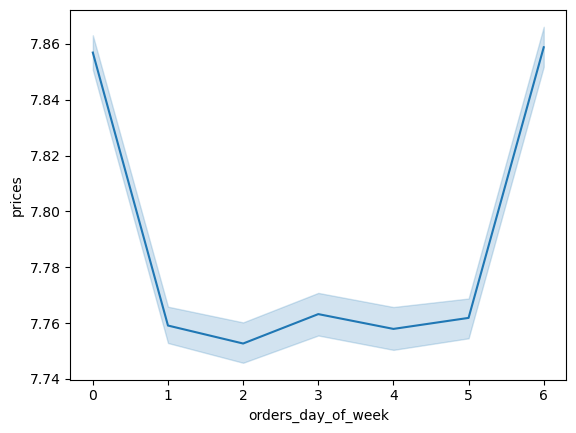

In [9]:
print('Line chart on sales price vs orders day of week')
print('-------------------------------------------')

line = sns.lineplot(data = df_small[['orders_day_of_week', 'prices']], x = 'orders_day_of_week',y = 'prices')

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_DOW_prices.png'))


## Histogram of the “order_hour_of_day” column

Histogram on order_hour_of_day
-------------------------------------------


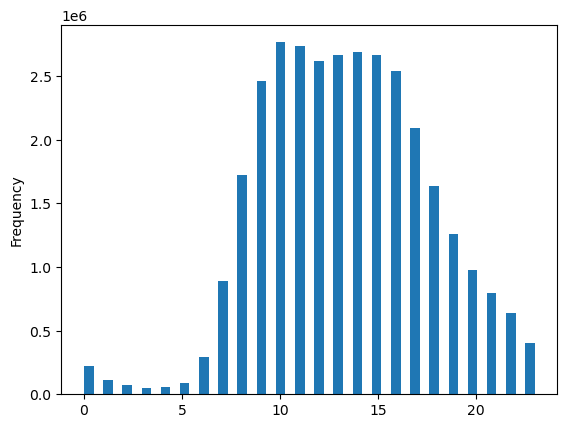

In [10]:
print('Histogram on order_hour_of_day')

print('-------------------------------------------')

histogram_order_HOD = df_ords_prods_custs['order_hour_of_day'].sort_index().plot.hist(bins = 47)


histogram_order_HOD.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_HOD.png'))

#### Histogram results
        
        The histogram order_hour_of_day displays frequency of sales orders during the day hours. 
        
        Between 9 AM to 5 PM total sales orders are at peak making busy hours of the day. Total sales during the 
        hours is more than 2000K dollar.
        
        Morning hours between 7 to 8 AM and evening hours 6 PM to 8 PM have moderate sales order. 
        The total sales during the hours is between 500K to 1500K dollars
        
        Total sales orders during 11 PM to 6 AM hours are least compared to other hours. Making sales below 500K dollar
        
        

In [11]:
df_ords_prods_custs['order_hour_of_day'].value_counts().sort_index()


0      218951
1      115787
2       69435
3       51321
4       53284
5       88064
6      290796
7      891951
8     1719991
9     2456751
10    2764476
11    2738647
12    2620898
13    2663346
14    2691598
15    2664583
16    2537506
17    2089510
18    1637956
19    1259416
20     977049
21     796379
22     634743
23     402621
Name: order_hour_of_day, dtype: int64

## Bar chart from the “loyalty_flag”

#### Distribution of orders among customers in terms of loyalty. 

Bar Chart: Distribution of orders among customers in terms of loyality 
----------------------------------------------------------------
Regular customer    15891507
Loyal customer      10294027
New customer         6249525
Name: loyalty_flag, dtype: int64


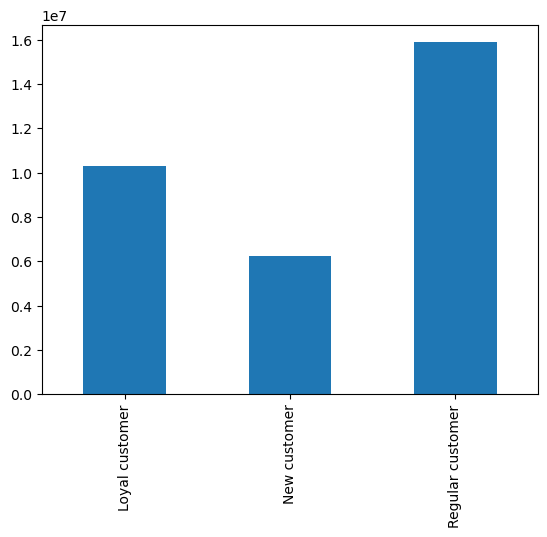

In [12]:
print('Bar Chart: Distribution of orders among customers in terms of loyality ')

print('----------------------------------------------------------------')

bar = df_ords_prods_custs['loyalty_flag'].value_counts().sort_index().plot.bar()

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

print (df_ords_prods_custs['loyalty_flag'].value_counts())

## Line chart 

### Line chart to demonstrate difference in expenditure depending on the hour of the day.

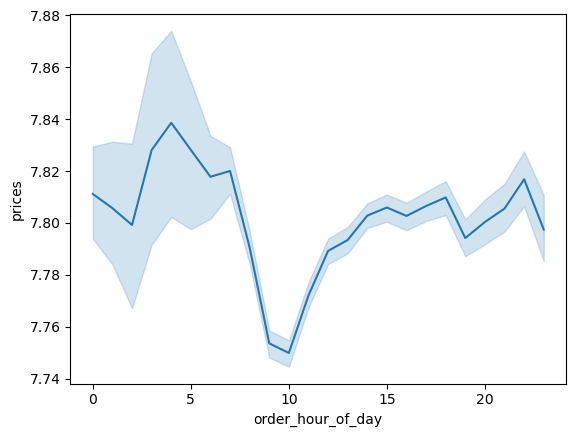

In [13]:
line = sns.lineplot(data = df_ords_prods_custs[['order_hour_of_day', 'prices']], x = 'order_hour_of_day',y = 'prices')

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_HOD_vs_prices.png'))

#### Analysis on the line chart



## Line chart 

### Line chart exploring the connections between age and number of dependents:

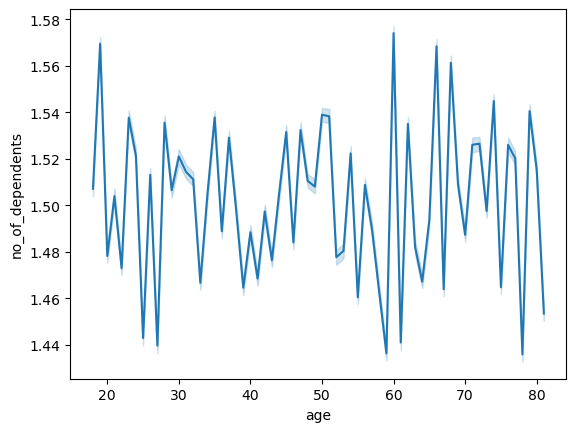

In [14]:
line_age_nod = sns.lineplot(data = df_ords_prods_custs[['age', 'no_of_dependents']], x = 'age',y = 'no_of_dependents')

line_age_nod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_numberOfDependents.png'))

#### Analysis on the line graph

From the line graph it is clear there is no correlation between the age and number of dependent in the family. 
The line graph scattered same variation across all the age groups.

## Scatter plot:  Connection between age and spending power

Scatter plot: Connection between age and income
-----------------------------------------------------------


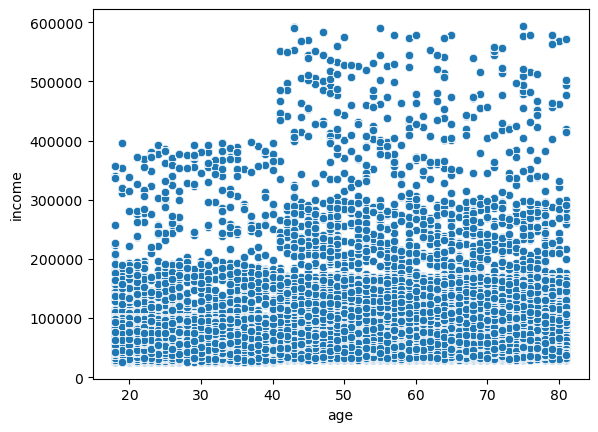

In [15]:
print('Scatter plot: Connection between age and income')
print('-----------------------------------------------------------')

scatter_plot_income = sns.scatterplot(x = 'age', y = 'income',data = df_ords_prods_custs[['age','income']])
scatter_plot_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_plot_income_age.png'))

### Analysis on the scatter plot

Age between 20 to 39 have the moderate income making average income below 200K. Where as the age between 40 to 80 have the average the income more than the age below 40 years. 


In [4]:
print(df_ords_prods_custs.columns)

df_ords_prods_custs = df_ords_prods_custs.drop(columns = ['_merge'])

print('Total columns in final export file')
print(df_ords_prods_custs.columns)

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busy_days_of_the_week',
       'busiest_period_of_day', 'loyalty_flag', 'spending_flag',
       'frequency_flag', 'First Name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'no_of_dependents', 'marital_status', 'income',
       '_merge'],
      dtype='object')
Total columns in final export file
Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busy_days_of_the_week',
       'busiest_period_of_day', 'loyalty_flag', 'spending_flag',
       'frequency_flag', 'First Name', 'last_name', 'gender', 'state', 'age',
       'dat

In [5]:
print('\n\nNumber of rows in combined order, product, customer data:', df_ords_prods_custs.shape[0])

print('Number of columns in combined order, product, customer data:', df_ords_prods_custs.shape[1])




Number of rows in combined order, product, customer data: 32435059
Number of columns in combined order, product, customer data: 28


In [6]:
print('Saving the dataframe after removing outliers from the price column..')

df_ords_prods_custs.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customer_filtered.pkl'))

print('Data exported successfully')

Saving the dataframe after removing outliers from the price column..
Data exported successfully
